<a href="https://colab.research.google.com/github/giannisgian/Teliki-ergasia/blob/main/AvgerOniTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Twython
import pandas as pd
import numpy as np 
from twython import Twython
import requests
from datetime import datetime
import ast
import time
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('ggplot')

CONSUMER_KEY = "DyoTjohC4arsxLFBjmh71l5Fi"
CONSUMER_SECRET = "sWE3WV27dOOsZnRpSo19bZCojZykVqftYh1uAQvCwqviro4jT1"
OAUTH_TOKEN = "1133494860554604545-aQrvZDpNyxgi6MwQbHegX8Bkx6CUfI"
OAUTH_TOKEN_SECRET = "inqueIKTVIqqKGXKiHS7dOwNvSmCQdWgYN83ih1kQkNkS"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
import spacy
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


# Θανάσης Αυγερινός
# https://twitter.com/AvgerinosMoscow

In [18]:
Avger = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='AvgerinosMoscow',count=300, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    # Add whatever you want from the tweet, here we just add the text
    Avger.append(tweet)

I Got: 200  tweets


In [19]:
# Count could be less than 200, see:
# https://dev.twitter.com/discussions/7513
while len(user_timeline) != 0: 
    try:
        user_timeline = twitter.get_user_timeline(screen_name='AvgerinosMoscow',count=100,
                                                  tweet_mode = 'extended', max_id=user_timeline[len(user_timeline)-1]['id']-1)
    except TwythonError as e:
        print("Error getting tweets:", e)
    if len(user_timeline) > 0:
        print("I Got:", len(user_timeline), " tweets more... Last ID:", user_timeline[len(user_timeline)-1]['id']-1)
    for tweet in user_timeline:
        # Add whatever you want from the tweet, here we just add the text
        Avger.append(tweet)
# Number of tweets the user has made
print("I got :", len(Avger), " in total!!!")

I Got: 100  tweets more... Last ID: 1534871884403122181
I Got: 100  tweets more... Last ID: 1532414068581191679
I Got: 99  tweets more... Last ID: 1528033466268504065
I Got: 100  tweets more... Last ID: 1524686695077195775
I Got: 99  tweets more... Last ID: 1517834443335114753
I Got: 100  tweets more... Last ID: 1515653650542211078
I Got: 100  tweets more... Last ID: 1511407910789734406
I Got: 97  tweets more... Last ID: 1505437771158151169
I Got: 97  tweets more... Last ID: 1501587052625809411
I Got: 94  tweets more... Last ID: 1495948911466500096
I Got: 94  tweets more... Last ID: 1492523337343504387
I Got: 94  tweets more... Last ID: 1487583185668091906
I Got: 97  tweets more... Last ID: 1479579357026959361
I Got: 95  tweets more... Last ID: 1460275221294985220
I Got: 100  tweets more... Last ID: 1439865355380350979
I Got: 100  tweets more... Last ID: 1427125930015825919
I Got: 100  tweets more... Last ID: 1409964087270948866
I Got: 99  tweets more... Last ID: 1402644257459130375
I 

In [20]:
# Number of tweets the user has made
print("I got :", len(Avger), " in total!!!")

I got : 3205  in total!!!


In [21]:
for tweet in Avger:
    print(tweet['created_at'],tweet['full_text'])

Wed Jul 06 09:12:15 +0000 2022 @Pandora_ip &amp; στη #Russia υπάρχουν διαφωνούντες με τον πόλεμο, τουλάχιστον 19% κατά τη δημοσκόπηση. Οι Ρώσοι που ζουν στο εξωτερικό, ή απλώς μακριά από το #Donbass μπορούν φυσικά να λένε ό,τι &amp; οι κοινωνίες όπου ζουν, αλλά πώς θα τα έλεγαν στους εκεί ακρωτηριασμένους &amp; θύματα 8 χρόνων; https://t.co/WnIgfQkzq2
Wed Jul 06 08:15:47 +0000 2022 @Pandora_ip Δεν καταλαβαίνω από πού συμπεραίνετε τη χαρά ή τη λύπη. Περιγράφω ένα γεγονός ή κάνω μια εκτίμηση: Γνωστοί μου άνθρωποι, που ταλαντεύονταν αρχικώς στη #Russia, στηρίζουν αναφανδόν #Putin λόγω κυρίως της ακραίας επιθετικής πολιτικής της Δύσης, που τους φόβισε &amp; τους ταπείνωσε.
Wed Jul 06 07:37:12 +0000 2022 @Pandora_ip Βλέπετε κάποιον πανηγυρισμό; Οι Ρώσοι και οι Ουκρανοί, ως Σλάβοι με κοινή ιστορία, είναι φαταλιστές κι έχουν τραβήξει πάρα πολλά. Aυτό αντανακλά κι η παροιμία. Τα βάσανα τούς χαλυβδώνουν. Κι εκεί που δεν υπάρχουν ορατά θύματα, πχ. κέντρο #Moscow #Kiev η ζωή συνεχίζεται κανονικά.

In [22]:
#Avger[0]

In [23]:
Avger_df = pd.DataFrame(Avger)
Avger_df

created_at                   id  \
0     Wed Jul 06 09:12:15 +0000 2022  1544610164686393344   
1     Wed Jul 06 08:15:47 +0000 2022  1544595956125122561   
2     Wed Jul 06 07:37:12 +0000 2022  1544586246336520192   
3     Wed Jul 06 07:31:02 +0000 2022  1544584694213316608   
4     Tue Jul 05 22:15:27 +0000 2022  1544444875562704901   
...                              ...                  ...   
3200  Sun Nov 15 18:33:00 +0000 2020  1328043337992073220   
3201  Sun Nov 15 18:25:50 +0000 2020  1328041533275320320   
3202  Sun Nov 15 18:21:31 +0000 2020  1328040448347222017   
3203  Sun Nov 15 18:08:16 +0000 2020  1328037116291534851   
3204  Sun Nov 15 18:03:21 +0000 2020  1328035877637992448   

                   id_str                                          full_text  \
0     1544610164686393344  @Pandora_ip &amp; στη #Russia υπάρχουν διαφωνο...   
1     1544595956125122561  @Pandora_ip Δεν καταλαβαίνω από πού συμπεραίνε...   
2     1544586246336520192  @Pandora_ip Βλέπετε κάποιον πανηγυρισμό; Οι Ρώ...   
3     1544584694213316608  Ο πρωθυπουργός της #Ukraine Σμιγκάλ δείχνει το...   
4     1544444875562704901  @CKilleridis *οι ίδιες δημοσκοπήσεις... Μας εί...   
...                   ...                                                ...   
3200  1328043337992073220  @GeorgeTetradis @alexandrostatoo Οι Αρμένιοι δ...   
3201  1328041533275320320  @alexandrostatoo @GeorgeTetradis Αυτή η λογική...   
3202  1328040448347222017  @islandgirl_dimi @GeorgeTetradis Προφανέστατα ...   
3203  1328037116291534851  @GeorgeTetradis @alexandrostatoo Υπάρχουν αμέτ...   
3204  1328035877637992448  @PennySmirlis @GeorgeTetradis Δεν με απασχολεί...   

      truncated display_text_range  \
0         False          [12, 298]   
1         False          [12, 292]   
2         False          [12, 291]   
3         False           [0, 276]   
4         False          [13, 179]   
...         ...                ...   
3200      False          [33, 317]   
3201      False          [33, 274]   
3202      False          [33, 311]   
3203      False          [33, 300]   
3204      False          [30, 242]   

                                               entities  \
0     {'hashtags': [{'text': 'Russia', 'indices': [2...   
1     {'hashtags': [{'text': 'Russia', 'indices': [1...   
2     {'hashtags': [{'text': 'Moscow', 'indices': [2...   
3     {'hashtags': [{'text': 'Ukraine', 'indices': [...   
4     {'hashtags': [{'text': 'Twitter', 'indices': [...   
...                                                 ...   
3200  {'hashtags': [], 'symbols': [], 'user_mentions...   
3201  {'hashtags': [], 'symbols': [], 'user_mentions...   
3202  {'hashtags': [], 'symbols': [], 'user_mentions...   
3203  {'hashtags': [], 'symbols': [], 'user_mentions...   
3204  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
0     {'media': [{'id': 1544610086181560322, 'id_str...   
1                                                   NaN   
2                                                   NaN   
3     {'media': [{'id': 1544584686336450562, 'id_str...   
4                                                   NaN   
...                                                 ...   
3200                                                NaN   
3201                                                NaN   
3202                                                NaN   
3203                                                NaN   
3204                                                NaN   

                                                 source  \
0     <a href="http://twitter.com/download/android" ...   
1     <a href="http://twitter.com/download/android" ...   
2     <a href="http://twitter.com/download/android" ...   
3     <a href="http://twitter.com/download/android" ...   
4     <a href="http://twitter.com/download/android" ...   
...                                                 ...   
3200  <a href="http://twitter.com/download/i

In [24]:
Avger_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/Avger.tsv", sep='\t')

# ONisenko
# https://twitter.com/Onisenko

In [25]:
Oni = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='Onisenko',count=200, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    # Add whatever you want from the tweet, here we just add the text
    Oni.append(tweet)

I Got: 199  tweets


In [26]:
# Count could be less than 200, see:
# https://dev.twitter.com/discussions/7513
while len(user_timeline) != 0: 
    try:
        user_timeline = twitter.get_user_timeline(screen_name='Onisenko',count=100,
                                                  tweet_mode = 'extended', max_id=user_timeline[len(user_timeline)-1]['id']-1)
    except TwythonError as e:
        print("Error getting tweets:", e)
    if len(user_timeline) > 0:
        print("I Got:", len(user_timeline), " tweets more... Last ID:", user_timeline[len(user_timeline)-1]['id']-1)
    for tweet in user_timeline:
        # Add whatever you want from the tweet, here we just add the text
        Oni.append(tweet)
# Number of tweets the user has made
print("I got :", len(Oni), " in total!!!")

I Got: 99  tweets more... Last ID: 1517809102969319423
I Got: 98  tweets more... Last ID: 1513953618625499138
I Got: 99  tweets more... Last ID: 1504812764019232768
I Got: 99  tweets more... Last ID: 1501083383983710208
I Got: 98  tweets more... Last ID: 1497563676332670980
I Got: 100  tweets more... Last ID: 1491818326305259525
I Got: 100  tweets more... Last ID: 1484984083851657215
I Got: 98  tweets more... Last ID: 1478743944469041160
I Got: 100  tweets more... Last ID: 1417538908615761920
I Got: 47  tweets more... Last ID: 438017211626946559
I got : 1137  in total!!!


In [27]:
# Number of tweets the user has made
print("I got :", len(Oni), " in total!!!")
#len(Oni)

I got : 1137  in total!!!


In [28]:
for tweet in Oni:
    print(tweet['created_at'],tweet['full_text'])

Wed Jul 06 10:34:35 +0000 2022 RT @enikos_gr: Τεχνολογία: Γιατί δεν πρέπει να ανεβάζετε φωτογραφίες παιδιών στο διαδίκτυο – Οι 6 απειλές https://t.co/dDzzsUhcdA
Wed Jul 06 08:32:37 +0000 2022 RT @HannaLiubakova: #Belarus This young and brave Belarusian was sentenced to 6.5 years in prison for a post criticising Putin and Lukashen…
Wed Jul 06 08:06:47 +0000 2022 RT @NTarnopolsky: #Breaking: In crackdown against Russian Jews Russia orders the Jewish Agency– the quasi-governmental body that facilitate…
Tue Jul 05 20:02:13 +0000 2022 Οι κάτοικοι του κρεμλινου μίλησαν για το «μέλλον της ιστορίας» τους. Θα δούμε πόσο μακριά στην ιστορία τους είναι διατεθειμένοι να φτάσουν. https://t.co/VmpuBhKUTt
Tue Jul 05 17:09:22 +0000 2022 132η μέρα εισβολής - σταυρωμένα αγοράκια και άλλα δαιμόνια https://t.co/X6y6yYHfav
Tue Jul 05 06:33:32 +0000 2022 Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ένας από τους πυλώνες του φασιστικού καθεστώτος του κρεμλίνου μίλησε σήμερα για "ρεβανσιστικές διαθέσεις της 

In [29]:
#Oni[0]

In [30]:
Oni_df = pd.DataFrame(Oni)
Oni_df.head()

created_at                   id               id_str  \
0  Wed Jul 06 10:34:35 +0000 2022  1544630884036403200  1544630884036403200   
1  Wed Jul 06 08:32:37 +0000 2022  1544600192216977414  1544600192216977414   
2  Wed Jul 06 08:06:47 +0000 2022  1544593688914976769  1544593688914976769   
3  Tue Jul 05 20:02:13 +0000 2022  1544411345667461120  1544411345667461120   
4  Tue Jul 05 17:09:22 +0000 2022  1544367848889262080  1544367848889262080   

                                           full_text  truncated  \
0  RT @enikos_gr: Τεχνολογία: Γιατί δεν πρέπει να...      False   
1  RT @HannaLiubakova: #Belarus This young and br...      False   
2  RT @NTarnopolsky: #Breaking: In crackdown agai...      False   
3  Οι κάτοικοι του κρεμλινου μίλησαν για το «μέλλ...      False   
4  132η μέρα εισβολής - σταυρωμένα αγοράκια και ά...      False   

  display_text_range                                           entities  \
0           [0, 129]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 140]  {'hashtags': [{'text': 'Belarus', 'indices': [...   
2           [0, 140]  {'hashtags': [{'text': 'Breaking', 'indices': ...   
3           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4            [0, 82]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="https://periscope.tv" rel="nofollow">...                    NaN   

  in_reply_to_status_id_str  ...  favorite_count favorited retweeted  \
0                      None  ...               0     False     False   
1                      None  ...               0     False     False   
2                      None  ...               0     False     False   
3                      None  ...              58     False     False   
4                      None  ...              35     False     False   

  possibly_sensitive lang                                  extended_entities  \
0              False   el                                                NaN   
1                NaN   en                                                NaN   
2                NaN   en                                                NaN   
3              False   el  {'media': [{'id': 1544411340311339009, 'id_str...   
4              False   el                                                NaN   

  quoted_status_id quoted_status_id_str quoted_status_permalink  quoted_status  
0              NaN                  NaN                     NaN            NaN  
1              NaN                  NaN                     NaN            NaN  
2              NaN                  NaN                     NaN            NaN  
3              NaN                  NaN                     NaN            NaN  
4              NaN                  NaN                     NaN            NaN  

[5 rows x 31 columns]

In [31]:
Oni_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/Oni.tsv", sep='\t')

# Επεξεργασία Avger df

In [32]:
Avger = Avger_df[['created_at','full_text' ]]
Avger = Avger.rename(columns={'created_at': 'date', 'full_text': 'text'} )
Avger

date  \
0     Wed Jul 06 09:12:15 +0000 2022   
1     Wed Jul 06 08:15:47 +0000 2022   
2     Wed Jul 06 07:37:12 +0000 2022   
3     Wed Jul 06 07:31:02 +0000 2022   
4     Tue Jul 05 22:15:27 +0000 2022   
...                              ...   
3200  Sun Nov 15 18:33:00 +0000 2020   
3201  Sun Nov 15 18:25:50 +0000 2020   
3202  Sun Nov 15 18:21:31 +0000 2020   
3203  Sun Nov 15 18:08:16 +0000 2020   
3204  Sun Nov 15 18:03:21 +0000 2020   

                                                   text  
0     @Pandora_ip &amp; στη #Russia υπάρχουν διαφωνο...  
1     @Pandora_ip Δεν καταλαβαίνω από πού συμπεραίνε...  
2     @Pandora_ip Βλέπετε κάποιον πανηγυρισμό; Οι Ρώ...  
3     Ο πρωθυπουργός της #Ukraine Σμιγκάλ δείχνει το...  
4     @CKilleridis *οι ίδιες δημοσκοπήσεις... Μας εί...  
...                                                 ...  
3200  @GeorgeTetradis @alexandrostatoo Οι Αρμένιοι δ...  
3201  @alexandrostatoo @GeorgeTetradis Αυτή η λογική...  
3202  @islandgirl_dimi @GeorgeTetradis Προφανέστατα ...  
3203  @GeorgeTetradis @alexandrostatoo Υπάρχουν αμέτ...  
3204  @PennySmirlis @GeorgeTetradis Δεν με απασχολεί...  

[3205 rows x 2 columns]

In [33]:
#Avger.dtypes

In [34]:
Avger['year'] = pd.DatetimeIndex(Avger['date']).year
Avger['month'] = pd.DatetimeIndex(Avger['date']).month
Avger['day'] = pd.DatetimeIndex(Avger['date']).day
Avger

date  \
0     Wed Jul 06 09:12:15 +0000 2022   
1     Wed Jul 06 08:15:47 +0000 2022   
2     Wed Jul 06 07:37:12 +0000 2022   
3     Wed Jul 06 07:31:02 +0000 2022   
4     Tue Jul 05 22:15:27 +0000 2022   
...                              ...   
3200  Sun Nov 15 18:33:00 +0000 2020   
3201  Sun Nov 15 18:25:50 +0000 2020   
3202  Sun Nov 15 18:21:31 +0000 2020   
3203  Sun Nov 15 18:08:16 +0000 2020   
3204  Sun Nov 15 18:03:21 +0000 2020   

                                                   text  year  month  day  
0     @Pandora_ip &amp; στη #Russia υπάρχουν διαφωνο...  2022      7    6  
1     @Pandora_ip Δεν καταλαβαίνω από πού συμπεραίνε...  2022      7    6  
2     @Pandora_ip Βλέπετε κάποιον πανηγυρισμό; Οι Ρώ...  2022      7    6  
3     Ο πρωθυπουργός της #Ukraine Σμιγκάλ δείχνει το...  2022      7    6  
4     @CKilleridis *οι ίδιες δημοσκοπήσεις... Μας εί...  2022      7    5  
...                                                 ...   ...    ...  ...  
3200  @GeorgeTetradis @alexandrostatoo Οι Αρμένιοι δ...  2020     11   15  
3201  @alexandrostatoo @GeorgeTetradis Αυτή η λογική...  2020     11   15  
3202  @islandgirl_dimi @GeorgeTetradis Προφανέστατα ...  2020     11   15  
3203  @GeorgeTetradis @alexandrostatoo Υπάρχουν αμέτ...  2020     11   15  
3204  @PennySmirlis @GeorgeTetradis Δεν με απασχολεί...  2020     11   15  

[3205 rows x 5 columns]

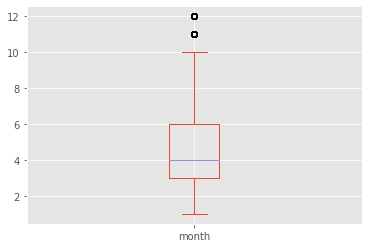

In [35]:
Avger['month'].plot(kind='box')

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [37]:
Avger[Avger['year']==2022]['text']

0       @Pandora_ip &amp; στη #Russia υπάρχουν διαφωνο...
1       @Pandora_ip Δεν καταλαβαίνω από πού συμπεραίνε...
2       @Pandora_ip Βλέπετε κάποιον πανηγυρισμό; Οι Ρώ...
3       Ο πρωθυπουργός της #Ukraine Σμιγκάλ δείχνει το...
4       @CKilleridis *οι ίδιες δημοσκοπήσεις... Μας εί...
                              ...                        
1477    RT @XrPanag: Εξαιρετικά δυσάρεστη απόφαση για ...
1478    @RT_com's account has been withheld in Belgium...
1479    RT @OpenNewsGr: Έσχατο όπλο οι κυρώσεις, θα ση...
1480    RT @OpenNewsGr: Η ανταπόκριση του Θανάση Αυγερ...
1481    RT @Kosmodromio_gr: 2022, μπες με… ένα τραγούδ...
Name: text, Length: 1482, dtype: object

In [38]:
# Ισως καποτε χρειαστεί να αφαιρέσουμε τους τόνους.....
text = Avger['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [39]:
text = Avger[Avger['year']==2020]['text'].str.cat(sep = '.').replace("amp", ' ')
text

'RT @XrPanag: Το τελευταίο δελτίο του χρόνου από το @OpenNewsGr. Στις 18.50 με τον @ipapadopoulos. @MARIAZAHARAKI @AvgerinosMoscow @mignatio….RT @mazzenilsson: What does it look like when you “liberate” a country that hasn’t asked for it, when you unleash a violent chain of events….RT @EmbassyofRussia: #OTD in 1922, the Union of Soviet Socialist Republics (USSR), one of the largest states ever existed, was established.….RT @st_stavropoulos: Τώρα που μπαίνουμε στα 200 χρόνια από το 1821,οι αντικληρικανοι (του ευγενούς κλάδου των ευρωλιγουρηδων), ας προσπαθήσ….RT @GeorgeTetradis: Οι ηλίθιοι φασίστες που επιτίθενται στίς "Πλειάδες"επειδή ψώνισε ο Μητσοτάκης από κει, δεν ξερουν ότι το βιβλιοπωλείο ε….RT @st_stavropoulos: "Αριστεροί" που επιτίθενται σε βιβλιοπωλείο, ως άλλοι ναζηδες, επειδή από αυτό ψώνισε βιβλία ο Μητσοτάκης, είναι αχθος….RT @XrPanag: Ο @AvgerinosMoscow στο δελτίο του @OpenNewsGr. @MARIAZAHARAKI @alexiatasouli.RT @OpenNewsGr: Η Μόσχα ρίχνει γέφυρες στο καθεστώς Σάρατζ – Ού

In [40]:
list(STOPWORDS)[0:20]

['and',
 'i',
 'their',
 "aren't",
 'as',
 'then',
 'same',
 "you'll",
 'me',
 'doing',
 'cannot',
 'k',
 'himself',
 'whom',
 'shall',
 'her',
 'only',
 'why',
 "shouldn't",
 'how']

In [41]:
nlp = spacy.load('el_core_news_sm')
list(nlp.Defaults.stop_words)[0:20]

['τούτο',
 'τον',
 'ταύτου',
 'μου',
 'προς',
 'δίχως',
 'πού',
 'τόσου',
 'ταύτων',
 'καμίας',
 'εκάστων',
 'περισσότερο',
 'έκαστον',
 'πλάι',
 'τέτοιου',
 'μόνες',
 'κάποτε',
 'εναντίον',
 'κάμποσο',
 'ορισμένων']

In [42]:
text = Avger['text'].str.cat(sep = '.').replace('.','').strip()
text = text.replace('amp','').strip()
text = text.replace('rt','').strip()
text = text.replace('\n','').strip()
text = text.replace(':','').strip()
text

'@Pandora_ip &; στη #Russia υπάρχουν διαφωνούντες με τον πόλεμο, τουλάχιστον 19% κατά τη δημοσκόπηση Οι Ρώσοι που ζουν στο εξωτερικό, ή απλώς μακριά από το #Donbass μπορούν φυσικά να λένε ό,τι &; οι κοινωνίες όπου ζουν, αλλά πώς θα τα έλεγαν στους εκεί ακρωτηριασμένους &; θύματα 8 χρόνων; https//tco/WnIgfQkzq2@Pandora_ip Δεν καταλαβαίνω από πού συμπεραίνετε τη χαρά ή τη λύπη Περιγράφω ένα γεγονός ή κάνω μια εκτίμηση Γνωστοί μου άνθρωποι, που ταλαντεύονταν αρχικώς στη #Russia, στηρίζουν αναφανδόν #Putin λόγω κυρίως της ακραίας επιθετικής πολιτικής της Δύσης, που τους φόβισε &; τους ταπείνωσε@Pandora_ip Βλέπετε κάποιον πανηγυρισμό; Οι Ρώσοι και οι Ουκρανοί, ως Σλάβοι με κοινή ιστορία, είναι φαταλιστές κι έχουν τραβήξει πάρα πολλά Aυτό αντανακλά κι η παροιμία Τα βάσανα τούς χαλυβδώνουν Κι εκεί που δεν υπάρχουν ορατά θύματα, πχ κέντρο #Moscow #Kiev η ζωή συνεχίζεται κανονικάΟ πρωθυπουργός της #Ukraine Σμιγκάλ δείχνει το σχέδιο ανοικοδόμησης της χώρας και ποιες χώρες θα αναλάβουν ποια περιο

In [43]:
from PIL import Image
import numpy as np

In [44]:
doc = nlp(Avger['text'][1])

In [45]:
for token in doc:
    print(token, token.lemma_)

@Pandora_ip @Pandora_ipς
Δεν δεν
καταλαβαίνω καταλαβαίνω
από από
πού πού
συμπεραίνετε συμπεραίνω
τη ο
χαρά χαρά
ή ή
τη ο
λύπη λύπη
. .
Περιγράφω Περιγράφω
ένα ένας
γεγονός γεγονός
ή ή
κάνω κάνω
μια ένας
εκτίμηση εκτίμηση
: :
Γνωστοί Γνωστοί
μου μου
άνθρωποι άνθρωπος
, ,
που που
ταλαντεύονταν ταλαντεύονταν
αρχικώς αρχικώς
στη σε ο
# #
Russia Russia
, ,
στηρίζουν στηρίζω
αναφανδόν αναφανδόν
# #
Putin Putin
λόγω λόγω
κυρίως κυρίως
της ο
ακραίας ακραία
επιθετικής επιθετικός
πολιτικής πολιτική
της ο
Δύσης δύση
, ,
που που
τους εγώ
φόβισε φοβίζω
& &
amp amp
; ;
τους τους
ταπείνωσε ταπείνωσε
. .


In [46]:
' '.join(token.lemma_ for token in doc)

'@Pandora_ipς δεν καταλαβαίνω από πού συμπεραίνω ο χαρά ή ο λύπη . Περιγράφω ένας γεγονός ή κάνω ένας εκτίμηση : Γνωστοί μου άνθρωπος , που ταλαντεύονταν αρχικώς σε ο # Russia , στηρίζω αναφανδόν # Putin λόγω κυρίως ο ακραία επιθετικός πολιτική ο δύση , που εγώ φοβίζω & amp ; τους ταπείνωσε .'

In [47]:
text

'@Pandora_ip &; στη #Russia υπάρχουν διαφωνούντες με τον πόλεμο, τουλάχιστον 19% κατά τη δημοσκόπηση Οι Ρώσοι που ζουν στο εξωτερικό, ή απλώς μακριά από το #Donbass μπορούν φυσικά να λένε ό,τι &; οι κοινωνίες όπου ζουν, αλλά πώς θα τα έλεγαν στους εκεί ακρωτηριασμένους &; θύματα 8 χρόνων; https//tco/WnIgfQkzq2@Pandora_ip Δεν καταλαβαίνω από πού συμπεραίνετε τη χαρά ή τη λύπη Περιγράφω ένα γεγονός ή κάνω μια εκτίμηση Γνωστοί μου άνθρωποι, που ταλαντεύονταν αρχικώς στη #Russia, στηρίζουν αναφανδόν #Putin λόγω κυρίως της ακραίας επιθετικής πολιτικής της Δύσης, που τους φόβισε &; τους ταπείνωσε@Pandora_ip Βλέπετε κάποιον πανηγυρισμό; Οι Ρώσοι και οι Ουκρανοί, ως Σλάβοι με κοινή ιστορία, είναι φαταλιστές κι έχουν τραβήξει πάρα πολλά Aυτό αντανακλά κι η παροιμία Τα βάσανα τούς χαλυβδώνουν Κι εκεί που δεν υπάρχουν ορατά θύματα, πχ κέντρο #Moscow #Kiev η ζωή συνεχίζεται κανονικάΟ πρωθυπουργός της #Ukraine Σμιγκάλ δείχνει το σχέδιο ανοικοδόμησης της χώρας και ποιες χώρες θα αναλάβουν ποια περιο

In [48]:
full_doc = nlp(text)

In [49]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [50]:
clear_text[200:400]

'ωνία όπου ζω , αλλά πώς θα εγώ έλεγαν σε ο εκεί ακρωτηριασμένος & ; θύμα 8 χρόνος ; https//tco / WnIgfQkzq2@Pandora_ip δεν καταλαβαίνω από πού συμπεραίνω ο χαρά ή ο λύπη Περιγράφω ένας γεγονός ή κάνω '

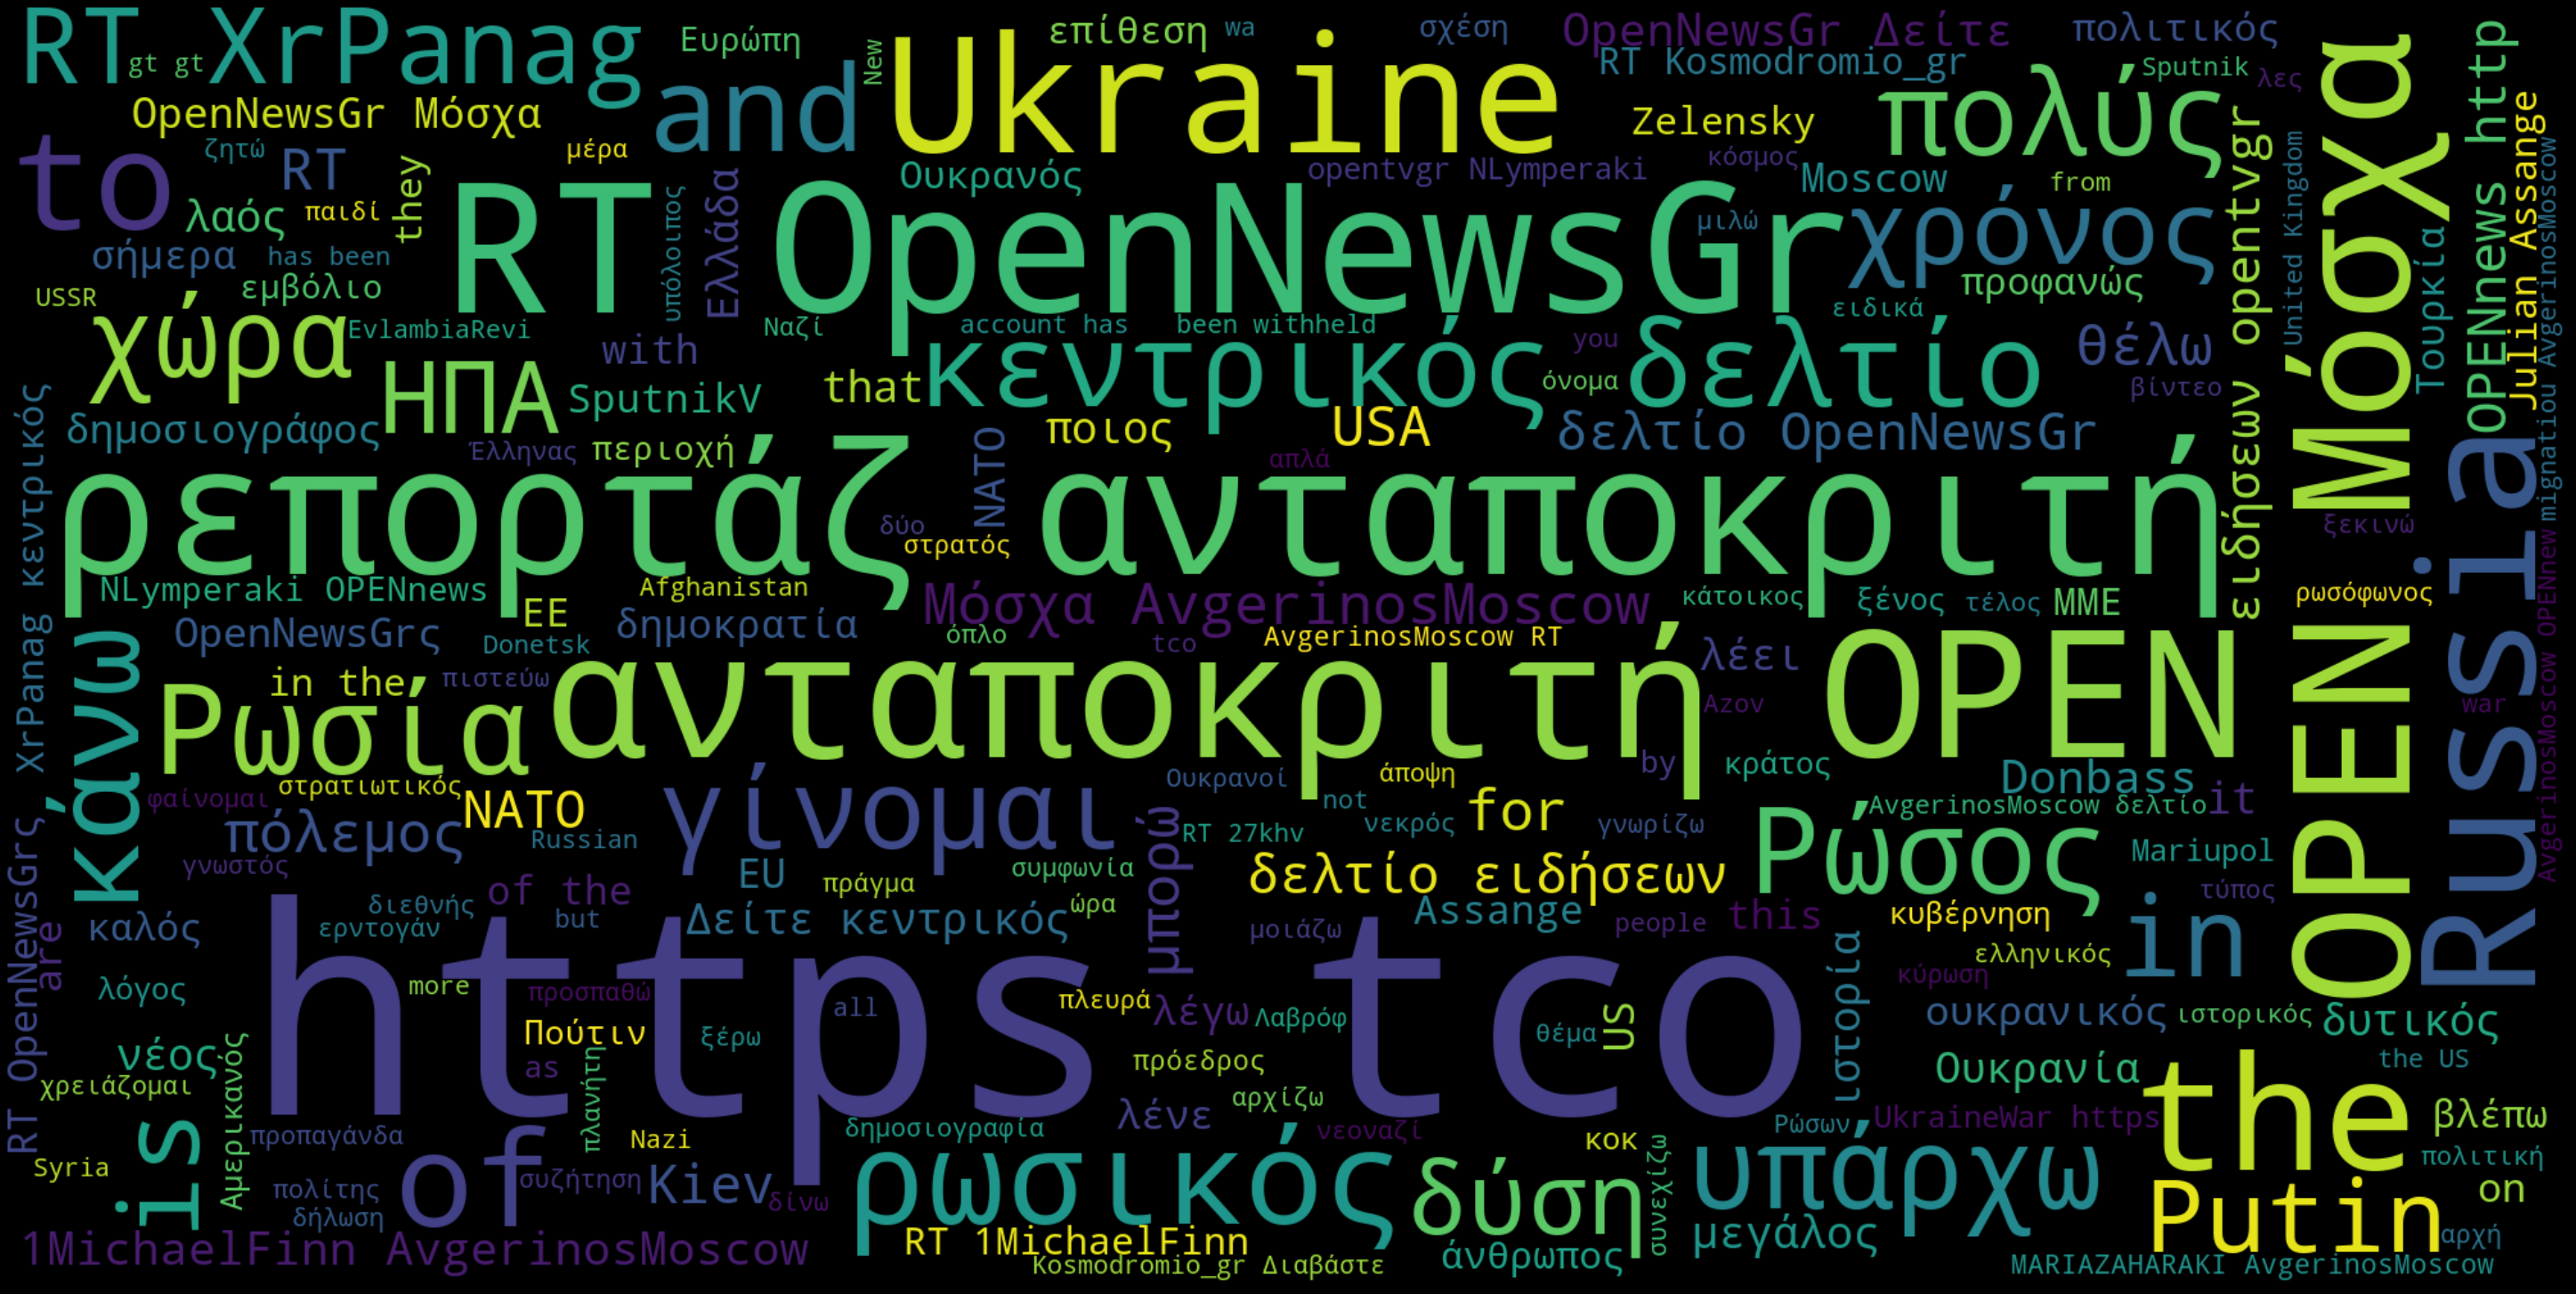

In [51]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words, 
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [52]:
from collections import Counter
Counter(" ".join(Avger["text"]).split()).most_common(16)

[('RT', 1766),
 ('του', 1698),
 ('και', 1322),
 ('να', 1171),
 ('το', 1099),
 ('για', 893),
 ('της', 805),
 ('η', 771),
 ('που', 769),
 ('με', 744),
 ('από', 695),
 ('@OpenNewsGr:', 652),
 ('την', 627),
 ('&amp;', 609),
 ('Το', 588),
 ('τα', 580)]

In [53]:
for word in nlp.Defaults.stop_words:
  print(word)
  break

τούτο


In [54]:
Avger['text_no_stopwords'] = Avger['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words) and word != ':' and word != '\n' and word != "amp" and word != 'rt' and word != ',']))
Avger['text_no_stopwords'] = Avger['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words)]))
Avger['clean_text_no_stopwords'] = Avger['text']
#for stopword in nlp.Defaults.stop_words:
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in nlp.Defaults.stop_words and word != "ή" and word != "ία" and word != "κι"]))
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: x.replace("amp", "").strip())
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: x.replace("rt", "").strip())
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: x.replace(":", "").strip())
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: x.replace(",", "").strip())
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: x.replace("\n", "").strip())
Avger['clean_text_no_stopwords'] = Avger['clean_text_no_stopwords'].apply(lambda x: x.replace(".", "").strip())

In [55]:
freq = Counter(" ".join(Avger["clean_text_no_stopwords"]).split()).most_common(16)
freq

[('RT', 1766),
 ('@OpenNewsGr', 811),
 ('&;', 609),
 ('Το', 588),
 ('|', 458),
 ('the', 418),
 ('ρεπορτάζ', 406),
 ('Μόσχα', 385),
 ('@AvgerinosMoscow', 318),
 ('ανταποκριτή', 314),
 ('OPEN', 299),
 ('Η', 270),
 ('-', 263),
 ('in', 251),
 ('to', 248),
 ('of', 242)]

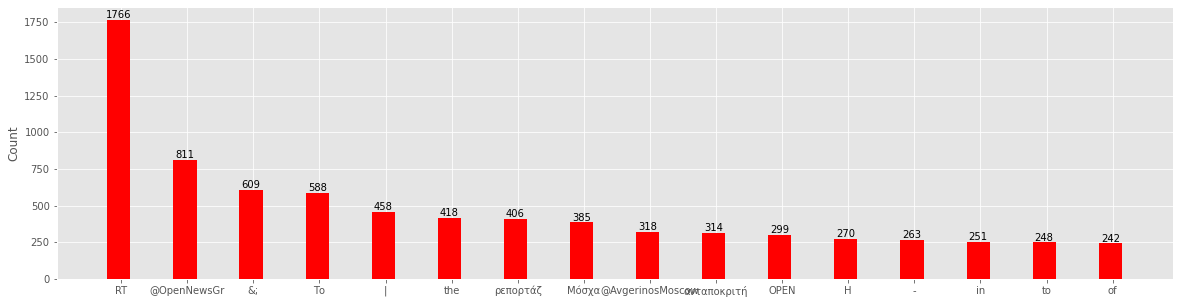

In [56]:
names, values = zip(*freq)
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(freq))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(ind, values, width, color='r')
# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/10.)
ax.set_xticklabels(names)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

# Επεξεργασία Onidf

In [57]:
Oni = Oni_df[['created_at','full_text' ]]
Oni = Oni.rename(columns={'created_at': 'date', 'full_text': 'text'} )
Oni

date  \
0     Wed Jul 06 10:34:35 +0000 2022   
1     Wed Jul 06 08:32:37 +0000 2022   
2     Wed Jul 06 08:06:47 +0000 2022   
3     Tue Jul 05 20:02:13 +0000 2022   
4     Tue Jul 05 17:09:22 +0000 2022   
...                              ...   
1132  Wed Apr 01 14:20:11 +0000 2020   
1133  Fri Sep 06 18:44:05 +0000 2019   
1134  Mon Apr 28 14:06:07 +0000 2014   
1135  Mon Apr 28 13:43:39 +0000 2014   
1136  Mon Feb 24 18:26:55 +0000 2014   

                                                   text  
0     RT @enikos_gr: Τεχνολογία: Γιατί δεν πρέπει να...  
1     RT @HannaLiubakova: #Belarus This young and br...  
2     RT @NTarnopolsky: #Breaking: In crackdown agai...  
3     Οι κάτοικοι του κρεμλινου μίλησαν για το «μέλλ...  
4     132η μέρα εισβολής - σταυρωμένα αγοράκια και ά...  
...                                                 ...  
1132  Έγραψα ένα βίντεο για τον ρόλο των μυστικών υπ...  
1133  RT @KappaNewsGr: Βασικός ύποπτος στην υπόθεση ...  
1134  @POPOVRTR Международная журналистика вас не за...  
1135  Simon Ostrovsky tells the full story of his ab...  
1136                 Στο μπλόκο! http://t.co/o7jiqGUNqr  

[1137 rows x 2 columns]

In [58]:
#Oni.dtypes

In [59]:
Oni['year'] = pd.DatetimeIndex(Oni['date']).year
Oni['month'] = pd.DatetimeIndex(Oni['date']).month
Oni['day'] = pd.DatetimeIndex(Oni['date']).day
Oni

date  \
0     Wed Jul 06 10:34:35 +0000 2022   
1     Wed Jul 06 08:32:37 +0000 2022   
2     Wed Jul 06 08:06:47 +0000 2022   
3     Tue Jul 05 20:02:13 +0000 2022   
4     Tue Jul 05 17:09:22 +0000 2022   
...                              ...   
1132  Wed Apr 01 14:20:11 +0000 2020   
1133  Fri Sep 06 18:44:05 +0000 2019   
1134  Mon Apr 28 14:06:07 +0000 2014   
1135  Mon Apr 28 13:43:39 +0000 2014   
1136  Mon Feb 24 18:26:55 +0000 2014   

                                                   text  year  month  day  
0     RT @enikos_gr: Τεχνολογία: Γιατί δεν πρέπει να...  2022      7    6  
1     RT @HannaLiubakova: #Belarus This young and br...  2022      7    6  
2     RT @NTarnopolsky: #Breaking: In crackdown agai...  2022      7    6  
3     Οι κάτοικοι του κρεμλινου μίλησαν για το «μέλλ...  2022      7    5  
4     132η μέρα εισβολής - σταυρωμένα αγοράκια και ά...  2022      7    5  
...                                                 ...   ...    ...  ...  
1132  Έγραψα ένα βίντεο για τον ρόλο των μυστικών υπ...  2020      4    1  
1133  RT @KappaNewsGr: Βασικός ύποπτος στην υπόθεση ...  2019      9    6  
1134  @POPOVRTR Международная журналистика вас не за...  2014      4   28  
1135  Simon Ostrovsky tells the full story of his ab...  2014      4   28  
1136                 Στο μπλόκο! http://t.co/o7jiqGUNqr  2014      2   24  

[1137 rows x 5 columns]

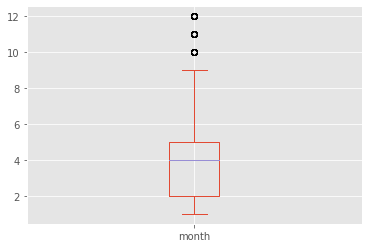

In [60]:
Oni['month'].plot(kind='box')

In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [62]:
Oni[Oni['year']==2022]['text']

0      RT @enikos_gr: Τεχνολογία: Γιατί δεν πρέπει να...
1      RT @HannaLiubakova: #Belarus This young and br...
2      RT @NTarnopolsky: #Breaking: In crackdown agai...
3      Οι κάτοικοι του κρεμλινου μίλησαν για το «μέλλ...
4      132η μέρα εισβολής - σταυρωμένα αγοράκια και ά...
                             ...                        
995    σύντομα στο παγκόσμιο βιβλιοπωλείο https://t.c...
996    Το βραβείο ηλιθιότητας πάει στον νοτιοκορεάτη,...
997    Ένα από τα πολλά πράγματα που είχε απαγορεύσει...
998    @Jorge_Irraizoz Κάνει πολλά λάθη ο Ζε. Κυρίως ...
999    Μίλησαν χθες Μπάιντεν με τον Ζελένσκι τηλεφωνι...
Name: text, Length: 1000, dtype: object

In [63]:
# Ισως καποτε χρειαστεί να αφαιρέσουμε τους τόνους.....
text = Oni['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [64]:
text = Oni[Oni['year']==2022]['text'].str.cat(sep = '.').replace("amp", ' ')
text

'RT @enikos_gr: Τεχνολογία: Γιατί δεν πρέπει να ανεβάζετε φωτογραφίες παιδιών στο διαδίκτυο – Οι 6 απειλές https://t.co/dDzzsUhcdA.RT @HannaLiubakova: #Belarus This young and brave Belarusian was sentenced to 6.5 years in prison for a post criticising Putin and Lukashen….RT @NTarnopolsky: #Breaking: In crackdown against Russian Jews Russia orders the Jewish Agency– the quasi-governmental body that facilitate….Οι κάτοικοι του κρεμλινου μίλησαν για το «μέλλον της ιστορίας» τους. Θα δούμε πόσο μακριά στην ιστορία τους είναι διατεθειμένοι να φτάσουν. https://t.co/VmpuBhKUTt.132η μέρα εισβολής - σταυρωμένα αγοράκια και άλλα δαιμόνια https://t.co/X6y6yYHfav.Ο πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ένας από τους πυλώνες του φασιστικού καθεστώτος του κρεμλίνου μίλησε σήμερα για "ρεβανσιστικές διαθέσεις της Ιαπωνίας". Που πας ρε κακομοίρη!.Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε 4ο ράιχ..131η μέρα εισβολής - η φραουλολειχία της Μαρίας και η υποκρισία ορισμένων “αριστεροί” https://t.c

In [65]:
list(STOPWORDS)[0:20]

['and',
 'i',
 'their',
 "aren't",
 'as',
 'then',
 'same',
 "you'll",
 'me',
 'doing',
 'cannot',
 'k',
 'himself',
 'whom',
 'shall',
 'her',
 'only',
 'why',
 "shouldn't",
 'how']

In [66]:
nlp = spacy.load('el_core_news_sm')
list(nlp.Defaults.stop_words)[0:20]

['τούτο',
 'τον',
 'ταύτου',
 'μου',
 'προς',
 'δίχως',
 'πού',
 'τόσου',
 'ταύτων',
 'καμίας',
 'εκάστων',
 'περισσότερο',
 'έκαστον',
 'πλάι',
 'τέτοιου',
 'μόνες',
 'κάποτε',
 'εναντίον',
 'κάμποσο',
 'ορισμένων']

In [67]:
text = Oni['text'].str.cat(sep = '.').replace('.','').strip()
text = text.replace('amp','').strip()
text = text.replace('rt','').strip()
text = text.replace('\n','').strip()
text = text.replace(':','').strip()
text

'RT @enikos_gr Τεχνολογία Γιατί δεν πρέπει να ανεβάζετε φωτογραφίες παιδιών στο διαδίκτυο – Οι 6 απειλές https//tco/dDzzsUhcdART @HannaLiubakova #Belarus This young and brave Belarusian was sentenced to 65 years in prison for a post criticising Putin and Lukashen…RT @NTarnopolsky #Breaking In crackdown against Russian Jews Russia orders the Jewish Agency– the quasi-governmental body that facilitate…Οι κάτοικοι του κρεμλινου μίλησαν για το «μέλλον της ιστορίας» τους Θα δούμε πόσο μακριά στην ιστορία τους είναι διατεθειμένοι να φτάσουν https//tco/VmpuBhKUTt132η μέρα εισβολής - σταυρωμένα αγοράκια και άλλα δαιμόνια https//tco/X6y6yYHfavΟ πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ένας από τους πυλώνες του φασιστικού καθεστώτος του κρεμλίνου μίλησε σήμερα για "ρεβανσιστικές διαθέσεις της Ιαπωνίας" Που πας ρε κακομοίρη!Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε 4ο ράιχ131η μέρα εισβολής - η φραουλολειχία της Μαρίας και η υποκρισία ορισμένων “αριστεροί” https//tco/O8P2PB3dewΗ άχρηστη πλη

In [68]:
from PIL import Image
import numpy as np

In [69]:
doc = nlp(Oni['text'][1])

In [70]:
for token in doc:
    print(token, token.lemma_)

RT RT
@HannaLiubakova @HannaLiubakova
: :
# #
Belarus Belarus
This This
young young
and and
brave brave
Belarusian Belarusian
was was
sentenced sentenced
to to
6.5 6.5
years years
in in
prison prison
for for
a a
post post
criticising criticising
Putin Putin
and and
Lukashen Lukashen
… …


In [71]:
' '.join(token.lemma_ for token in doc)

'RT @HannaLiubakova : # Belarus This young and brave Belarusian was sentenced to 6.5 years in prison for a post criticising Putin and Lukashen …'

In [72]:
text

'RT @enikos_gr Τεχνολογία Γιατί δεν πρέπει να ανεβάζετε φωτογραφίες παιδιών στο διαδίκτυο – Οι 6 απειλές https//tco/dDzzsUhcdART @HannaLiubakova #Belarus This young and brave Belarusian was sentenced to 65 years in prison for a post criticising Putin and Lukashen…RT @NTarnopolsky #Breaking In crackdown against Russian Jews Russia orders the Jewish Agency– the quasi-governmental body that facilitate…Οι κάτοικοι του κρεμλινου μίλησαν για το «μέλλον της ιστορίας» τους Θα δούμε πόσο μακριά στην ιστορία τους είναι διατεθειμένοι να φτάσουν https//tco/VmpuBhKUTt132η μέρα εισβολής - σταυρωμένα αγοράκια και άλλα δαιμόνια https//tco/X6y6yYHfavΟ πάτρουσεβ, επικεφαλής του ΣΑ της ρωσίας και ένας από τους πυλώνες του φασιστικού καθεστώτος του κρεμλίνου μίλησε σήμερα για "ρεβανσιστικές διαθέσεις της Ιαπωνίας" Που πας ρε κακομοίρη!Ο πούτιν ήθελε να φτιάξει 3η Ρώμη και έφτιαξε 4ο ράιχ131η μέρα εισβολής - η φραουλολειχία της Μαρίας και η υποκρισία ορισμένων “αριστεροί” https//tco/O8P2PB3dewΗ άχρηστη πλη

In [73]:
full_doc = nlp(text)
clear_text = ' '.join(token.lemma_ for token in full_doc)
clear_text[200:400]

' to 65 years in prison for a post criticising Putin and Lukashen … RT @NTarnopolsky # Breaking In crackdown against Russian Jews Russia orders the Jewish Agency– the quasi-governmental body that facil'

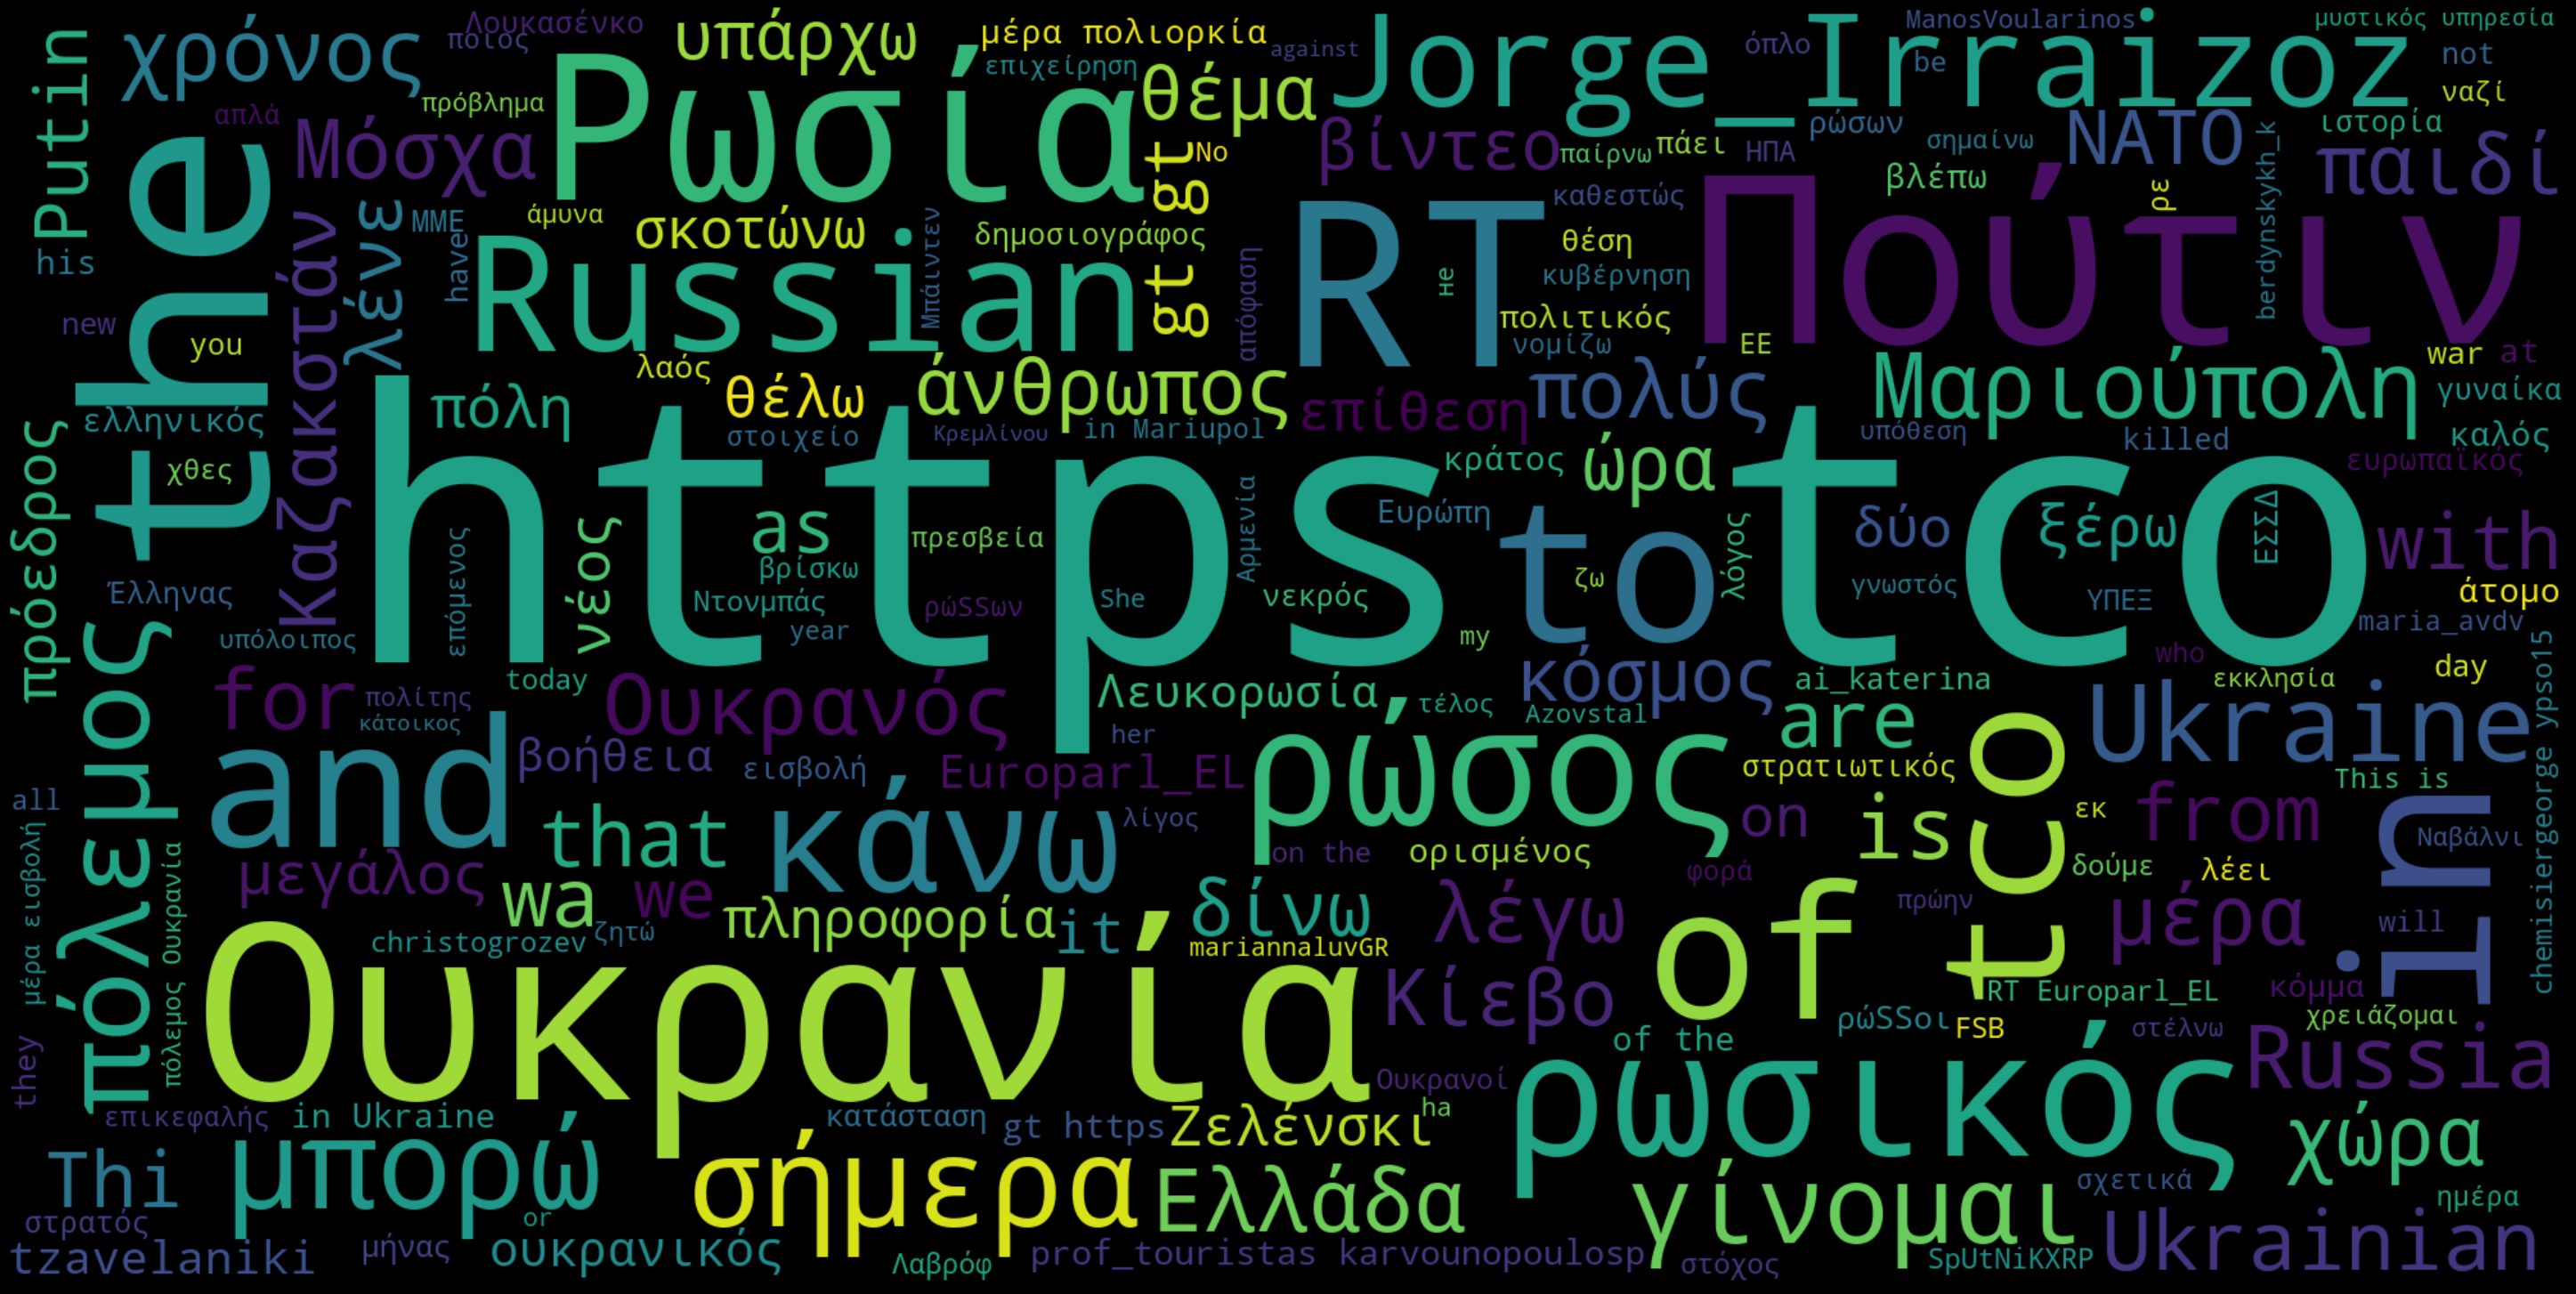

In [74]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [75]:
from collections import Counter
Counter(" ".join(Oni["text"]).split()).most_common(16)

[('και', 377),
 ('να', 338),
 ('το', 338),
 ('RT', 293),
 ('του', 288),
 ('της', 263),
 ('για', 247),
 ('από', 231),
 ('που', 208),
 ('την', 200),
 ('η', 197),
 ('με', 197),
 ('στην', 167),
 ('είναι', 161),
 ('στο', 159),
 ('ο', 156)]

In [76]:
for word in nlp.Defaults.stop_words:
  print(word)
  break

τούτο


In [77]:
Oni['text_no_stopwords'] = Oni['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words) and word != ':' and word != '\n' and word != "amp" and word != 'rt' and word != ',']))
Oni['text_no_stopwords'] = Oni['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words)]))
Oni['clean_text_no_stopwords'] = Oni['text']
#for stopword in nlp.Defaults.stop_words:
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in nlp.Defaults.stop_words and word != "ή" and word != "ία" and word != "κι"]))
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: x.replace("amp", "").strip())
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: x.replace("rt", "").strip())
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: x.replace(":", "").strip())
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: x.replace(",", "").strip())
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: x.replace("\n", "").strip())
Oni['clean_text_no_stopwords'] = Oni['clean_text_no_stopwords'].apply(lambda x: x.replace(".", "").strip())

In [78]:
freq = Counter(" ".join(Oni["clean_text_no_stopwords"]).split()).most_common(16)
freq

[('RT', 293),
 ('the', 120),
 ('-', 95),
 ('in', 93),
 ('Η', 85),
 ('of', 83),
 ('Ο', 82),
 ('a', 76),
 ('Πούτιν', 75),
 ('Ουκρανία', 70),
 ('to', 67),
 ('Οι', 53),
 ('and', 51),
 ('Το', 51),
 ('Ρωσία', 49),
 ('Russian', 42)]

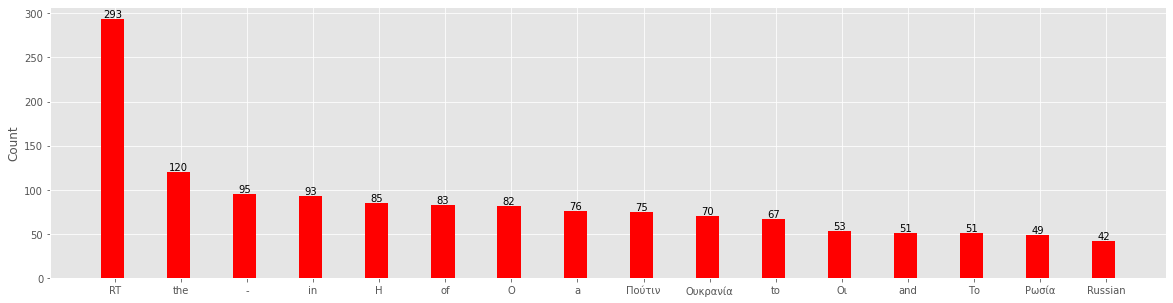

In [79]:
names, values = zip(*freq)
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(freq))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(ind, values, width, color='r')
# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/10.)
ax.set_xticklabels(names)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

# Emolex Avgerdf

In [80]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [81]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)

In [82]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [83]:
Avger_tweets_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Avger.tsv", sep='\t')

In [84]:
len(Avger_tweets_df)

3205

In [85]:
short_tweets_Avger = Avger_tweets_df[['created_at','full_text' ]]
short_tweets_Avger = short_tweets_Avger.rename(columns={'created_at': 'date', 'full_text': 'text'} )

In [86]:
#short_tweets_Avger.tail()

In [87]:
#short_tweets_Avger.dtypes

In [88]:
short_tweets_Avger['date'] = pd.to_datetime(short_tweets_Avger['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [89]:
short_tweets_Avger['year'] = pd.DatetimeIndex(short_tweets_Avger['date']).year
short_tweets_Avger['month'] = pd.DatetimeIndex(short_tweets_Avger['date']).month
short_tweets_Avger['day'] = pd.DatetimeIndex(short_tweets_Avger['date']).day
short_tweets_Avger

date                                               text  \
0    2022-07-06 09:12:15  @Pandora_ip &amp; στη #Russia υπάρχουν διαφωνο...   
1    2022-07-06 08:15:47  @Pandora_ip Δεν καταλαβαίνω από πού συμπεραίνε...   
2    2022-07-06 07:37:12  @Pandora_ip Βλέπετε κάποιον πανηγυρισμό; Οι Ρώ...   
3    2022-07-06 07:31:02  Ο πρωθυπουργός της #Ukraine Σμιγκάλ δείχνει το...   
4    2022-07-05 22:15:27  @CKilleridis *οι ίδιες δημοσκοπήσεις... Μας εί...   
...                  ...                                                ...   
3200 2020-11-15 18:33:00  @GeorgeTetradis @alexandrostatoo Οι Αρμένιοι δ...   
3201 2020-11-15 18:25:50  @alexandrostatoo @GeorgeTetradis Αυτή η λογική...   
3202 2020-11-15 18:21:31  @islandgirl_dimi @GeorgeTetradis Προφανέστατα ...   
3203 2020-11-15 18:08:16  @GeorgeTetradis @alexandrostatoo Υπάρχουν αμέτ...   
3204 2020-11-15 18:03:21  @PennySmirlis @GeorgeTetradis Δεν με απασχολεί...   

      year  month  day  
0     2022      7    6  
1     2022      7    6  
2     2022      7    6  
3     2022      7    6  
4     2022      7    5  
...    ...    ...  ...  
3200  2020     11   15  
3201  2020     11   15  
3202  2020     11   15  
3203  2020     11   15  
3204  2020     11   15  

[3205 rows x 5 columns]

In [90]:
#short_tweets_Avger.dtypes

In [91]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [92]:
short_tweets_Avger['text'] = short_tweets_Avger['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [93]:
#short_tweets_Avger.head()

In [94]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [95]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#              strip_accents = 'unicode', 
#               token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#               stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(short_tweets_Avger['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [96]:
wordcount_df.shape

(3205, 13161)

In [97]:
#emolex_df.head()

In [98]:
#emolex_df[emolex_df.Anger == 1].tail()

In [99]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']


In [100]:
#short_tweets_Avger.head(3)

In [101]:
short_tweets_Avger['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets_Avger['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets_Avger['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets_Avger['disgust'] = wordcount_df[disgust_words].sum(axis=1)



short_tweets_Avger['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets_Avger['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets_Avger['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets_Avger['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets_Avger['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets_Avger['fear'] = wordcount_df[fear_words].sum(axis=1)


In [102]:
#short_tweets_Avger

In [103]:
max = 0
happiest_tweet = ""
for i in range(0,len(short_tweets_Avger)):
  #print(short_tweets_Avger.iloc[i]['positivity'])
  if short_tweets_Avger.iloc[i]['positivity'] > max:
    happiest_tweet = short_tweets_Avger.iloc[i]['text']
    max = short_tweets_Avger.iloc[i]['positivity']


happiest_tweet

'@alexkara1989 Αν θέλετε να κάνετε αυθαίρετες ερμηνείες σε τι αρέσκομαι ή προσπαθώ, μπορώ να αυθαιρετίσω κι εγώ. Προς το παρόν συζητάω, οπότε διευκρινίστε μας: 1) Η Επανάσταση του 1821 κι η Μικρασιατική Εκστρατεία ήταν αναθεωρητισμοί; 2) Υπάρχει καλός και κακός αναθεωρητισμός ή ιμπεριαλισμός;'

In [104]:
max = 0
negative_tweet = ""
for i in range(0,len(short_tweets_Avger)):
  #print(short_tweets_Avger.iloc[i]['positivity'])
  if short_tweets_Avger.iloc[i]['negative'] > max:
    negative_tweet = short_tweets_Avger.iloc[i]['text']
    max = short_tweets_Avger.iloc[i]['negative']


negative_tweet

'@greekphase @kostarvanitis Κάθε θάνατος προκαλεί θλίψη, η οποία δεν μπορεί, όμως να είναι επιλεκτική. Μέχρι σήμερα από το 2014 και τη βίαια ανατροπή του Γιανουκόβιτς στην #Ukraine έχουν δυστυχώς σκοτωθεί κατά τον ΟΑΣΕ 13-14.000 άνθρωποι στην εμφύλια σύρραξη...'

In [105]:
max = 0
saddest_tweet = ""
for i in range(0,len(short_tweets_Avger)):
  #print(short_tweets_Avger.iloc[i]['positivity'])
  if short_tweets_Avger.iloc[i]['sadness'] > max:
    saddest_tweet = short_tweets_Avger.iloc[i]['text']
    max = short_tweets_Avger.iloc[i]['sadness']

saddest_tweet

'Τι να κάνει κι ο εξόριστος Ουκρανός συνάδελφος, που εκδιώχθηκε από το #Kiev, χασκογελάει με το επίπεδο της δημοσιογραφίας μας: "Ο άρρωστος με καρκίνο, που μόλις συνήλθε από κώμα #Putin ήδη μιλάει 3 ώρες χωρίς διακοπή στο Φόρουμ Αγίας Πετρούπολης. Θαύματα της ρωσικής ιατρικής!"...  '

In [106]:
max = 0
fear_tweet = ""
for i in range(0,len(short_tweets_Avger)):
  #print(short_tweets_Avger.iloc[i]['positivity'])
  if short_tweets_Avger.iloc[i]['fear'] > max:
    fear_tweet = short_tweets_Avger.iloc[i]['text']
    max = short_tweets_Avger.iloc[i]['fear']

fear_tweet

'5 νεκροί, 20 τραυματίες από τυφλό χτύπημα με πολλαπλό εκτοξευτήρα από το πυροβολικό της #Ukraine κοντά στην παρόχθια οδό του ποταμού  #Kalmius στο #Donetsk. Ουδεμία "στρατιωτική" λογική στο χτύπημα, μόνο εκδίκηση και μόνο άμαχοι εκεί, τα μέτωπα είναι αλλού  '

In [107]:
max = 0
trust_tweet = ""
for i in range(0,len(short_tweets_Avger)):
  #print(short_tweets_Avger.iloc[i]['positivity'])
  if short_tweets_Avger.iloc[i]['trust'] > max:
    trust_tweet = short_tweets_Avger.iloc[i]['text']
    max = short_tweets_Avger.iloc[i]['trust']

trust_tweet

'@kentrodexia Βάλε ρετσέτα, στερεότυπο, δεν είναι το βασικό, η "μασημένη από πριν τροφή" είναι το βασικό. Ο Χίτλερ ηττήθηκε, ο Στάλιν νίκησε, με μεγάλες θυσίες, ίσως &amp; να ήταν πύρρειος η νίκη της #USSR τελικά αλλά τι σημασία έχει τώρα αυτό; Η #Russia ενδεχομένως &amp; να έχει διδαχθεί από λάθη της'

In [108]:
short_tweets_Avger.set_index('date' , inplace=True)

In [109]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

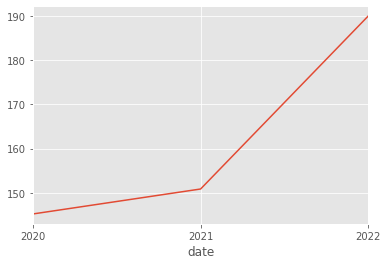

In [111]:
short_tweets_Avger['text'].str.len().resample('A').mean().plot() 

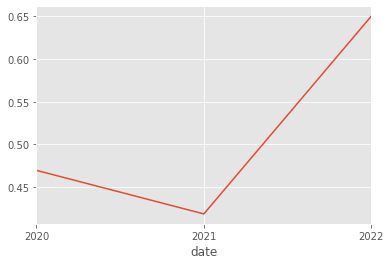

In [112]:
short_tweets_Avger['positivity'].resample('A').mean().plot() 

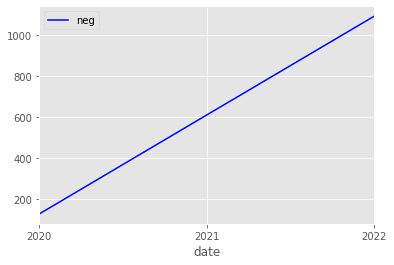

In [113]:
short_tweets_Avger['negative'].resample('A').sum().plot(color = 'b',label = 'neg').legend() 

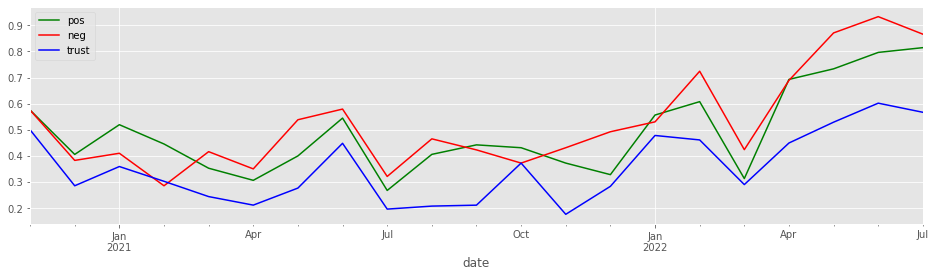

In [117]:
ax = short_tweets_Avger['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets_Avger['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets_Avger['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

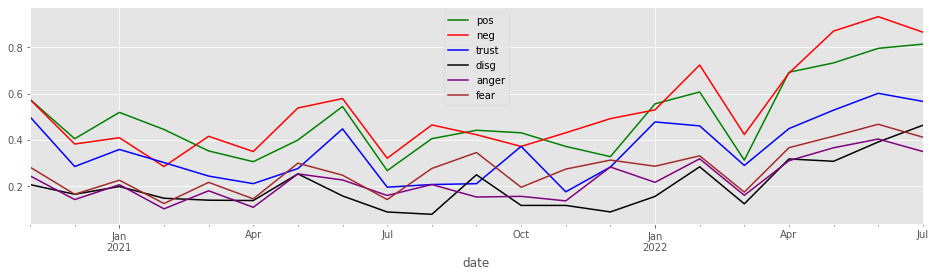

In [118]:
plt.style.use('ggplot')
ax = short_tweets_Avger['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets_Avger['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets_Avger['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

short_tweets_Avger['disgust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'disg',color = 'black').legend() 

short_tweets_Avger['anger'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'anger',color = 'purple').legend() 

short_tweets_Avger['fear'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'fear',color = 'brown').legend()    

Text(0, 0.5, 'Years')

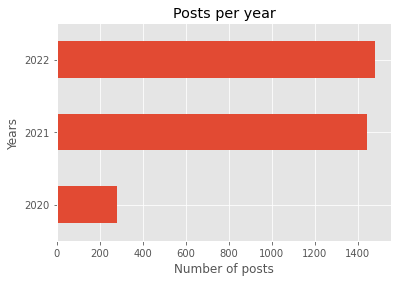

In [119]:
short_tweets_Avger['text'].groupby(by=short_tweets_Avger.index.year).count().plot(kind='barh')
plt.title("Posts per year")
plt.xlabel("Number of posts")
plt.ylabel("Years")

Text(0, 0.5, 'Month of the year')

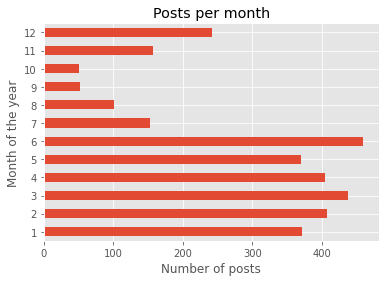

In [120]:
short_tweets_Avger['text'].groupby(by=short_tweets_Avger.index.month).count().plot(kind='barh')
plt.title("Posts per month")
plt.xlabel("Number of posts")
plt.ylabel("Month of the year")

Text(0, 0.5, 'Hour of the day')

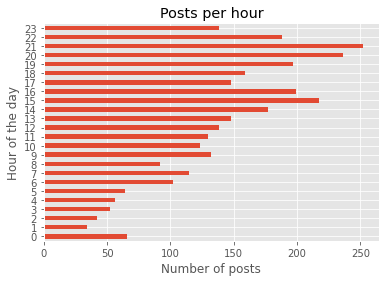

In [121]:
short_tweets_Avger['text'].groupby(by=short_tweets_Avger.index.hour).count().plot(kind='barh')
plt.title("Posts per hour")
plt.xlabel("Number of posts")
plt.ylabel("Hour of the day")

# Emolex Onidf

In [122]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [124]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)

In [125]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [126]:
Oni_tweets_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Oni.tsv", sep='\t')

In [127]:
len(Oni_tweets_df)

1137

In [131]:
short_tweets_Oni = Oni_tweets_df[['created_at','full_text' ]]
short_tweets_Oni = short_tweets_Oni.rename(columns={'created_at': 'date', 'full_text': 'text'} )
#short_tweets_Oni.tail()

In [132]:
#short_tweets_Oni.dtypes

In [133]:
short_tweets_Oni['date'] = pd.to_datetime(short_tweets_Oni['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [134]:
short_tweets_Oni['year'] = pd.DatetimeIndex(short_tweets_Oni['date']).year
short_tweets_Oni['month'] = pd.DatetimeIndex(short_tweets_Oni['date']).month
short_tweets_Oni['day'] = pd.DatetimeIndex(short_tweets_Oni['date']).day
short_tweets_Oni

date                                               text  \
0    2022-07-06 10:34:35  RT @enikos_gr: Τεχνολογία: Γιατί δεν πρέπει να...   
1    2022-07-06 08:32:37  RT @HannaLiubakova: #Belarus This young and br...   
2    2022-07-06 08:06:47  RT @NTarnopolsky: #Breaking: In crackdown agai...   
3    2022-07-05 20:02:13  Οι κάτοικοι του κρεμλινου μίλησαν για το «μέλλ...   
4    2022-07-05 17:09:22  132η μέρα εισβολής - σταυρωμένα αγοράκια και ά...   
...                  ...                                                ...   
1132 2020-04-01 14:20:11  Έγραψα ένα βίντεο για τον ρόλο των μυστικών υπ...   
1133 2019-09-06 18:44:05  RT @KappaNewsGr: Βασικός ύποπτος στην υπόθεση ...   
1134 2014-04-28 14:06:07  @POPOVRTR Международная журналистика вас не за...   
1135 2014-04-28 13:43:39  Simon Ostrovsky tells the full story of his ab...   
1136 2014-02-24 18:26:55                 Στο μπλόκο! http://t.co/o7jiqGUNqr   

      year  month  day  
0     2022      7    6  
1     2022      7    6  
2     2022      7    6  
3     2022      7    5  
4     2022      7    5  
...    ...    ...  ...  
1132  2020      4    1  
1133  2019      9    6  
1134  2014      4   28  
1135  2014      4   28  
1136  2014      2   24  

[1137 rows x 5 columns]

In [135]:
#short_tweets_Oni.dtypes

In [136]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
short_tweets_Oni['text'] = short_tweets_Oni['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [137]:
#short_tweets_Oni.head()

In [138]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [139]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#              strip_accents = 'unicode', 
#               token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#               stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(short_tweets_Oni['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [140]:
wordcount_df.shape

(1137, 13161)

In [141]:
#emolex_df.head()

In [142]:
#emolex_df[emolex_df.Anger == 1].tail()

In [143]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']


In [144]:
#short_tweets_Oni.head(3)

In [145]:
short_tweets_Oni['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets_Oni['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets_Oni['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets_Oni['disgust'] = wordcount_df[disgust_words].sum(axis=1)


short_tweets_Oni['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets_Oni['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets_Oni['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets_Oni['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets_Oni['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets_Oni['fear'] = wordcount_df[fear_words].sum(axis=1)


In [146]:
short_tweets_Oni

date                                               text  \
0    2022-07-06 10:34:35  RT @enikos_gr: Τεχνολογία: Γιατί δεν πρέπει να...   
1    2022-07-06 08:32:37  RT @HannaLiubakova: #Belarus This young and br...   
2    2022-07-06 08:06:47  RT @NTarnopolsky: #Breaking: In crackdown agai...   
3    2022-07-05 20:02:13  Οι κάτοικοι του κρεμλινου μίλησαν για το «μέλλ...   
4    2022-07-05 17:09:22  132η μέρα εισβολής - σταυρωμένα αγοράκια και ά...   
...                  ...                                                ...   
1132 2020-04-01 14:20:11  Έγραψα ένα βίντεο για τον ρόλο των μυστικών υπ...   
1133 2019-09-06 18:44:05  RT @KappaNewsGr: Βασικός ύποπτος στην υπόθεση ...   
1134 2014-04-28 14:06:07  @POPOVRTR Международная журналистика вас не за...   
1135 2014-04-28 13:43:39  Simon Ostrovsky tells the full story of his ab...   
1136 2014-02-24 18:26:55                 Στο μπλόκο! http://t.co/o7jiqGUNqr   

      year  month  day  anger  positivity  joy  disgust  surprise  trust  \
0     2022      7    6      0           1    0        0         0      0   
1     2022      7    6      0           0    0        0         0      0   
2     2022      7    6      0           0    0        0         0      0   
3     2022      7    5      0           0    0        0         0      0   
4     2022      7    5      0           0    0        0         0      0   
...    ...    ...  ...    ...         ...  ...      ...       ...    ...   
1132  2020      4    1      0           1    1        0         1      1   
1133  2019      9    6      1           0    0        0         1      0   
1134  2014      4   28      0           0    0        0         0      0   
1135  2014      4   28      0           0    0        0         0      0   
1136  2014      2   24      0           0    0        0         0      0   

      anticipation  sadness  negative  fear  
0                0        0         1     0  
1                0        0         0     0  
2                0        0         0     0  
3                0        0         0     0  
4                0        0         0     0  
...            ...      ...       ...   ...  
1132             1        0         0     0  
1133             2        1         2     2  
1134             0        0         0     0  
1135             0        0         0     0  
1136             0        0         0     0  

[1137 rows x 15 columns]

In [147]:
max = 0
happiest_tweet = ""
for i in range(0,len(short_tweets_Oni)):
  #print(short_tweets_Oni.iloc[i]['positivity'])
  if short_tweets_Oni.iloc[i]['positivity'] > max:
    happiest_tweet = short_tweets_Oni.iloc[i]['text']
    max = short_tweets_Oni.iloc[i]['positivity']


happiest_tweet

'RT @tzavelaniki: Η σκηνή με τον Πούτιν στην εκκλησία για την Ανάσταση, τελικά ήταν σκηνοθετημένη σε άδεια εκκλησία , όπου τραβήχτηκε το βίν…'

In [148]:
max = 0
negative_tweet = ""
for i in range(0,len(short_tweets_Oni)):
  #print(short_tweets_Oni.iloc[i]['positivity'])
  if short_tweets_Oni.iloc[i]['negative'] > max:
    negative_tweet = short_tweets_Oni.iloc[i]['text']
    max = short_tweets_Oni.iloc[i]['negative']


negative_tweet

'@SpUtNiKXRP δεν είναι ώρα για να συζητήσουμε τον ιστορικό ρόλο του  UPA ή κάποιοι άλλου. Εσείς βλέπετε το θέμα από τη δική σας σκοπιά, άλλοι από διαφορετική. Συγγνώμη που τα "κάναμε χάλια" και λερώσαμε το χαλί σας το αίμα μας. Τέλος συζήτησης.'

In [149]:
max = 0
saddest_tweet = ""
for i in range(0,len(short_tweets_Oni)):
  #print(short_tweets_Oni.iloc[i]['positivity'])
  if short_tweets_Oni.iloc[i]['sadness'] > max:
    saddest_tweet = short_tweets_Oni.iloc[i]['text']
    max = short_tweets_Oni.iloc[i]['sadness']

saddest_tweet

'Ακριβώς πριν 60 χρόνια, αφαιρέθηκε το μουμιοποιημένο πτώμα του δικτάτορα Ιωσήφ Τζουγκασβίλι (aka Στάλιν) από το μαυσωλείο στην Κόκκινη Πλατεία. Η μεταφορά και η ταφή έγιναν κρυφά, κατά τη διάρκεια νύχτας, σε άγνωστη τοποθεσία χωρίς διακριτικά. Όπως αξίζει σε ένα λυσσασμένο σκυλί. https://t.co/SOvWZQjsIb'

In [150]:
max = 0
fear_tweet = ""
for i in range(0,len(short_tweets_Oni)):
  #print(short_tweets_Oni.iloc[i]['positivity'])
  if short_tweets_Oni.iloc[i]['fear'] > max:
    fear_tweet = short_tweets_Oni.iloc[i]['text']
    max = short_tweets_Oni.iloc[i]['fear']

In [151]:
max = 0
anger_tweet = ""
for i in range(0,len(short_tweets_Oni)):
  #print(short_tweets_Oni.iloc[i]['positivity'])
  if short_tweets_Oni.iloc[i]['anger'] > max:
    anger_tweet = short_tweets_Oni.iloc[i]['text']
    max = short_tweets_Oni.iloc[i]['anger']

anger_tweet

'Οι θηριωδίες της Μαριούπολης είναι πολλαπλάσιες της Μπούτσα. Δεν έχει τέλος η φρίκη. Την ίδια ώρα οι ρώσοι μαζεύουν στρατό για νέα μεγάλη επίθεση. https://t.co/0tap5LzW5S'

In [152]:
max = 0
trust_tweet = ""
for i in range(0,len(short_tweets_Oni)):
  #print(short_tweets_Oni.iloc[i]['positivity'])
  if short_tweets_Oni.iloc[i]['trust'] > max:
    trust_tweet = short_tweets_Oni.iloc[i]['text']
    max = short_tweets_Oni.iloc[i]['trust']

trust_tweet

'RT @tzavelaniki: Η σκηνή με τον Πούτιν στην εκκλησία για την Ανάσταση, τελικά ήταν σκηνοθετημένη σε άδεια εκκλησία , όπου τραβήχτηκε το βίν…'

In [153]:
short_tweets_Oni.set_index('date' , inplace=True)

In [154]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

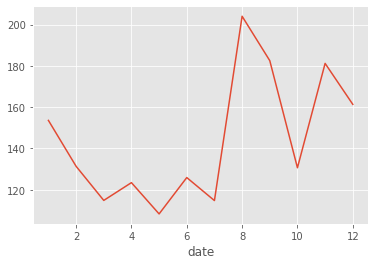

In [155]:
short_tweets_Oni['text'].str.len().groupby(by=short_tweets_Oni.index.month).mean().plot()

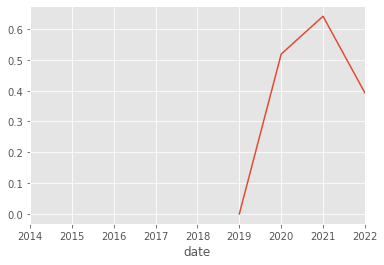

In [157]:
short_tweets_Oni['positivity'].resample('A').mean().plot() 

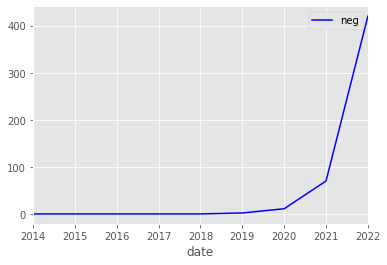

In [160]:
short_tweets_Oni['negative'].resample('A').sum().plot(color = 'b',label = 'neg').legend()

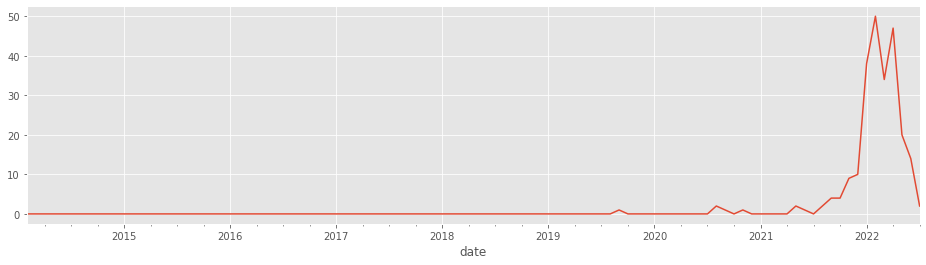

In [161]:
short_tweets_Oni['anger'].resample('M').sum().plot(figsize=(16,4))

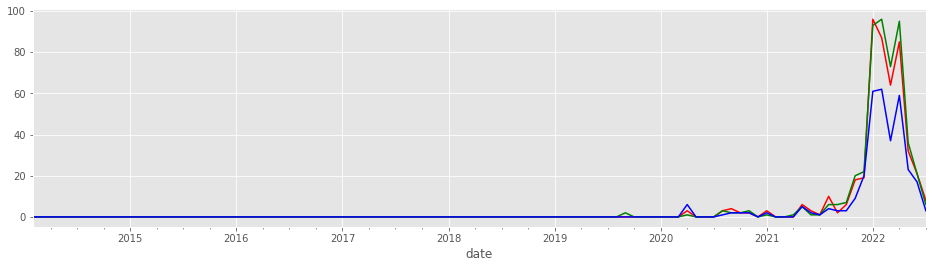

In [163]:
ax = short_tweets_Oni['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets_Oni['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_tweets_Oni['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

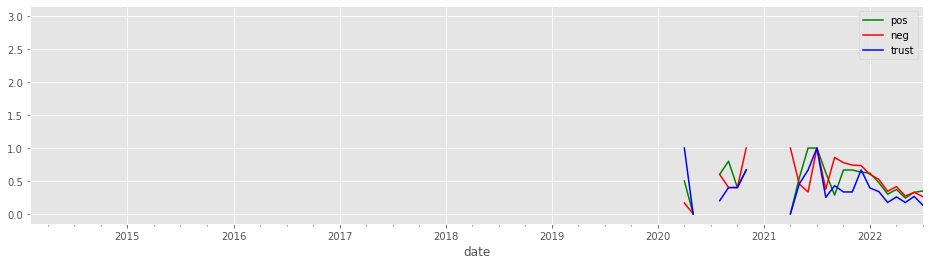

In [164]:
ax = short_tweets_Oni['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets_Oni['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets_Oni['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

Text(0, 0.5, 'Years')

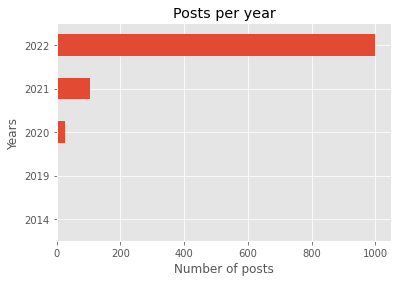

In [166]:
short_tweets_Oni['text'].groupby(by=short_tweets_Oni.index.year).count().plot(kind='barh')
plt.title("Posts per year")
plt.xlabel("Number of posts")
plt.ylabel("Years")

Text(0, 0.5, 'Month of the year')

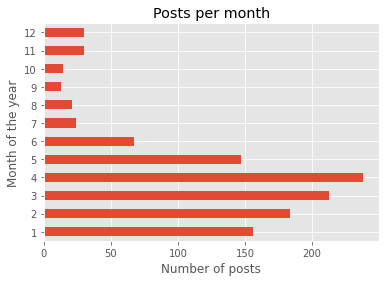

In [167]:
short_tweets_Oni['text'].groupby(by=short_tweets_Oni.index.month).count().plot(kind='barh')
plt.title("Posts per month")
plt.xlabel("Number of posts")
plt.ylabel("Month of the year")

Text(0, 0.5, 'Hour of the day')

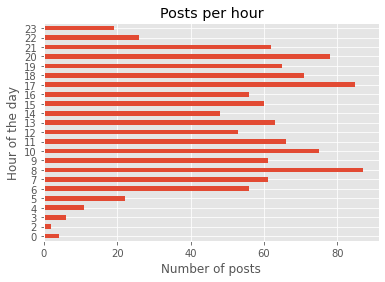

In [168]:
short_tweets_Oni['text'].groupby(by=short_tweets_Oni.index.hour).count().plot(kind='barh')
plt.title("Posts per hour")
plt.xlabel("Number of posts")
plt.ylabel("Hour of the day")

# Avgerdf - Onidf

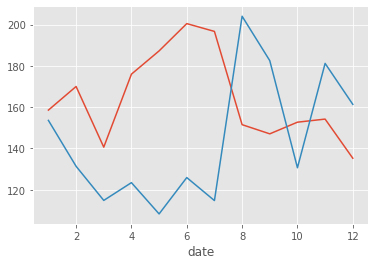

In [169]:
short_tweets_Avger['text'].str.len().groupby(by=short_tweets_Avger.index.month).mean().plot()
short_tweets_Oni['text'].str.len().groupby(by=short_tweets_Oni.index.month).mean().plot()

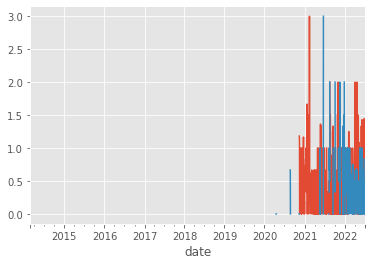

In [171]:
short_tweets_Avger['positivity'].resample('B').mean().plot() 
short_tweets_Oni['positivity'].resample('B').mean().plot() 

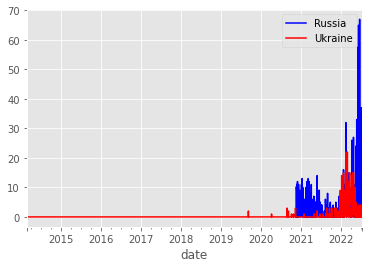

In [172]:
short_tweets_Avger['negative'].resample('B').sum().plot(color = 'b',label = 'Russia').legend() 
short_tweets_Oni['negative'].resample('B').sum().plot(color = 'r',label = 'Ukraine').legend() 

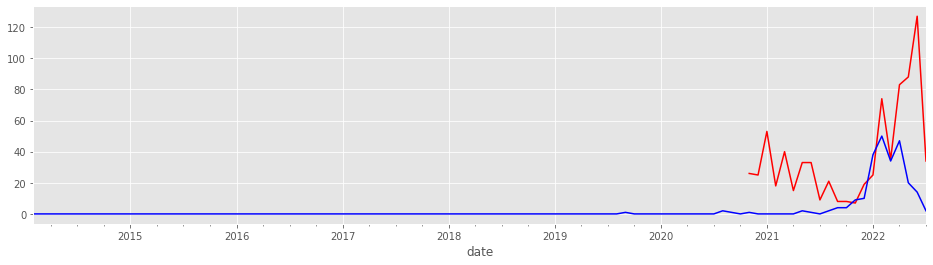

In [173]:
short_tweets_Avger['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets_Oni['anger'].resample('M').sum().plot(figsize=(16,4), color = 'blue')

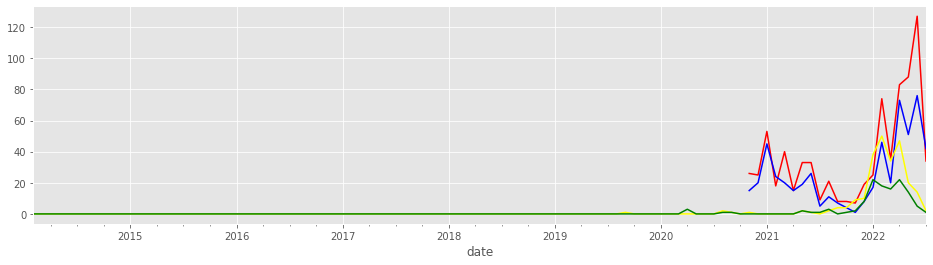

In [174]:
ax = short_tweets_Avger['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets_Avger['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
ax = short_tweets_Oni['anger'].resample('M').sum().plot(figsize=(16,4), color = 'yellow')
short_tweets_Oni['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

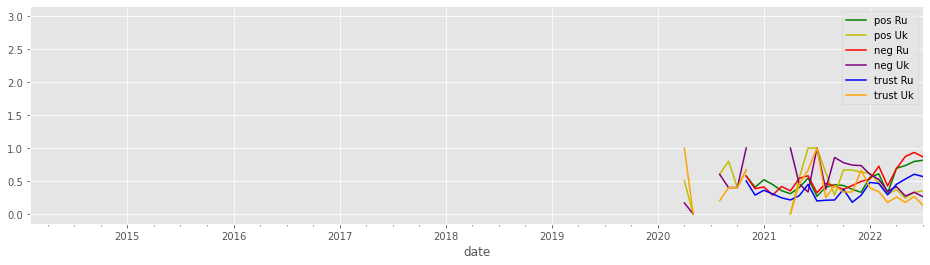

In [176]:
ax = short_tweets_Avger['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos Ru')
ax = short_tweets_Oni['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'y', label='pos Uk')
short_tweets_Avger['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Ru', color = 'r')
short_tweets_Oni['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Uk', color = 'purple')
short_tweets_Avger['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Ru',color = 'blue').legend()
short_tweets_Oni['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Uk',color = 'orange').legend()